In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [2]:
dataset = pd.read_csv('pd_speech_features.csv')
dataset.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


# Explore dataset

In [39]:
dataset.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [4]:
dataset.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [3]:
features = dataset.drop(['id', 'class'], axis=1)
target = dataset['class'].values
dataset['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [4]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
features.shape

(756, 753)

# Feature Selection

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
new_features = SelectKBest(f_classif, k=20).fit(features, target)

In [5]:
new_dataset = pd.DataFrame({'Feature': list(features.columns), 'Scores':new_features.scores_})
new_dataset = new_dataset.sort_values(by='Scores', ascending=False)
new_dataset

,Feature,Scores
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
...,...,...
350,tqwt_energy_dec_30,0.000607
685,tqwt_skewnessValue_dec_5,0.000462
343,tqwt_energy_dec_23,0.000161
339,tqwt_energy_dec_19,0.000089


In [6]:
new_features = new_features.transform(features)

In [7]:
columns = new_dataset.iloc[:20, 0].values
columns

array(['mean_MFCC_2nd_coef', 'tqwt_minValue_dec_12',
       'tqwt_stdValue_dec_12', 'tqwt_maxValue_dec_12',
       'tqwt_stdValue_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_maxValue_dec_11', 'tqwt_minValue_dec_11',
       'tqwt_minValue_dec_13', 'std_9th_delta_delta',
       'std_8th_delta_delta', 'tqwt_maxValue_dec_13',
       'std_7th_delta_delta', 'tqwt_stdValue_dec_13',
       'std_6th_delta_delta', 'tqwt_entropy_shannon_dec_11',
       'tqwt_kurtosisValue_dec_27', 'std_8th_delta',
       'tqwt_entropy_log_dec_11', 'tqwt_TKEO_std_dec_12'], dtype=object)

In [8]:
X = pd.DataFrame(new_features, columns=columns)

In [9]:
X

,mean_MFCC_2nd_coef,tqwt_minValue_dec_12,tqwt_stdValue_dec_12,tqwt_maxValue_dec_12,tqwt_stdValue_dec_11,tqwt_entropy_log_dec_12,tqwt_maxValue_dec_11,tqwt_minValue_dec_11,tqwt_minValue_dec_13,std_9th_delta_delta,std_8th_delta_delta,tqwt_maxValue_dec_13,std_7th_delta_delta,tqwt_stdValue_dec_13,std_6th_delta_delta,tqwt_entropy_shannon_dec_11,tqwt_kurtosisValue_dec_27,std_8th_delta,tqwt_entropy_log_dec_11,tqwt_TKEO_std_dec_12
0,2.48740,0.028115,0.014642,0.019681,0.012829,0.021703,4.8840,-229943.2967,-201985.0408,0.000059,0.005199,0.004324,0.013373,-0.026321,-0.024286,-0.048924,0.022796,0.024286,0.048924,1.5466
1,2.89860,0.022166,0.025500,0.019374,0.010645,0.020296,4.8483,-230526.8175,-203389.4678,0.000169,0.005221,0.004344,0.011184,-0.070039,-0.099695,-0.112210,0.080975,0.099695,0.112210,1.5530
2,3.22080,0.032326,0.024607,0.024819,0.016553,0.023186,1.9849,-246592.6024,-214707.2576,0.000021,0.003136,0.002657,0.008093,-0.019435,-0.026241,-0.039886,0.013810,0.026241,0.039886,1.5399
3,3.10230,0.032577,0.017274,0.016129,0.015533,0.011976,3.2053,-255107.4287,-160775.5650,0.000493,0.004537,0.016104,0.051620,-0.121640,-0.129990,-0.268930,0.111290,0.122970,0.273530,6.9761
4,2.94510,0.031989,0.013791,0.016059,0.014382,0.012686,2.7170,-252647.9964,-154087.6641,0.000328,0.003931,0.015422,0.051298,-0.078138,-0.115900,-0.227210,0.086621,0.102950,0.235860,7.8832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-1.97830,0.032791,0.012046,0.014700,0.011600,0.014449,154.3248,-149686.6810,-84988.3760,0.010388,0.038207,0.116780,0.264650,-0.325440,-0.491410,-0.651480,0.300560,0.463150,0.646970,3.4394
752,-1.45210,0.041971,0.023391,0.019244,0.017564,0.017151,92.2915,-165485.7833,-94367.1404,0.008655,0.028332,0.095527,0.219620,-0.198620,-0.369920,-0.591670,0.136800,0.270620,0.727660,19.6733
753,-1.13730,0.029193,0.013633,0.016366,0.013659,0.015405,166.6840,-150689.8732,-102610.9065,0.010128,0.039555,0.078863,0.099272,-0.162370,-0.298120,-0.357650,0.168010,0.277380,0.348020,137.3126
754,-0.17925,0.027188,0.016464,0.015774,0.012458,0.013842,94.8016,-162249.6582,-110627.8327,0.005484,0.028243,0.059031,0.079508,-0.115310,-0.190990,-0.269840,0.116660,0.211770,0.265250,5.4425


# Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X

array([[ 0.73517687, -0.92648377, -0.96159746, ..., -0.92645109,
        -0.92694092, -0.4458768 ],
       [ 0.98224594, -1.44864682,  0.64215356, ..., -0.13728568,
        -0.52035986, -0.4457303 ],
       [ 1.17583946, -0.55687063,  0.51025545, ..., -0.90599175,
        -0.98500558, -0.44603016],
       ...,
       [-1.44272019, -0.83186421, -1.11062903, ...,  1.72221196,
         0.99460208,  2.66175181],
       [-0.86707689, -1.00784957, -0.69248396, ...,  1.03559441,
         0.46284601, -0.35670123],
       [-0.33087932, -0.127835  ,  0.16684772, ...,  0.89672206,
         0.45018974, -0.22608863]])

# Train and Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 20)
(227, 20)
(529,)
(227,)


# LVQ

In [17]:
import math 
  
class LVQ : 
      
    # Function here computes the winning vector 
    # by Euclidean distance 
    def winner( self, weights, sample ) : 
          
        D0 = 0
        D1 = 0
          
        for i  in range( len( sample ) ) : 
            D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 ) 
            D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 ) 
              
            if D0 > D1 : 
                return 0
            else :  
                return 1
  
    # Function here updates the winning vector      
    def update( self, weights, sample, J, alpha ) : 
        for i in range(len(weights)) : 
            weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )  

            
# Driver code 
def main() : 
  
    # Training Samples ( m, n ) with their class vector 
    X1 = X.tolist()
    Y = target.tolist() 
    m, n = len( X ), len( X[0] ) 
      
    # weight initialization ( n, c ) 
    weights = [] 
    weights.append( X1.pop( 0 ) ) 
    weights.append( X1.pop( 1 ) ) 
  
    # Samples used in weight initialization will 
    # not use in training 
    m = m - 2
      
    # training 
    ob = LVQ() 
    epochs = 3
    alpha = 0.1
      
    for i in range( epochs ) : 
        for j in range( m ) : 
              
            # Sample selection 
            T = X[j] 
              
            # Compute winner 
            J = ob.winner( weights, T ) 
          
            # Update weights 
            ob.update( weights, T, J, alpha ) 
              
    # classify new input sample 
    T = [2.4874, 0.028114999999999998, 0.014641999999999999, 0.019681, 0.012828999999999998, 0.021703, 4.8839999999999995, -229943.2967, -201985.0408, 5.9e-05, 0.005198899999999999, 0.004324100000000001, 0.013373, -0.026320999999999997, -0.024286000000000002, -0.048924, 0.022796, 0.024286000000000002, 0.048924, 1.5466]
    J = ob.winner( weights, T ) 
    print( "Sample T belongs to class : ", J ) 
    print( "Trained weights : ", weights ) 
      
if __name__ == "__main__": 
    main() 

Sample T belongs to class :  0
Trained weights :  [[-0.4249937443865368, -0.25850332488579225, -0.9615974584867087, -0.004352874034026021, -1.0704691805291504, 0.7686680398212685, -0.46297550599237086, -0.38947394321136314, -1.053603055123508, -0.4278301178664821, -0.5893817538162895, -0.7003441161150096, -0.7615530655669343, 0.8077662009864621, 0.9277959958838452, 0.9222324326064899, -0.8725961053500316, -0.926451093596213, -0.9269409237860066, -0.4458767972219299], [-0.4083705911148583, -0.13813309608133229, 0.5102554517757886, 0.8367653587033851, -0.3434631220497722, 1.058265148842369, -0.5000873169675802, -0.759975165715155, -1.3620504146805619, -0.4370913382904312, -0.7361374419580649, -0.7574040319432496, -0.8588694331840296, 0.9116551413552767, 0.9072963128754442, 0.9796860623622541, -1.012797804288801, -0.9059917532934496, -0.985005577595821, -0.4460301575012111]]


In [31]:
import numpy as np

# train_lvq: trains an lvq system using the given training data and
# corresponding labels. Run the desired number of epochs using the
# given learning rate. Optional validation set to monitor performance.
def train_lvq(data, labels, num_epochs, learning_rate, validation_data=None, validation_labels=None):
    # Get unique class labels.
    num_dims = data.shape[1]
    labels = labels.astype(int)
    unique_labels = list(set(labels))

    num_protos = len(unique_labels)
    prototypes = np.empty((num_protos, num_dims))
    proto_labels = []

    # Initialize prototypes using class means.
    for i in unique_labels:
        class_data = data[labels == i, :]

        # Compute class mean.
        mean = np.mean(class_data, axis=0)

        prototypes[i] = mean
        proto_labels.append(i)

    # Loop through data set.
    for epoch in range(0, num_epochs):
        for fvec, lbl in zip(data, labels):
            # Compute distance from each prototype to this point
            distances = list(np.sum(np.subtract(fvec, p)**2) for p in prototypes)
            min_dist_index = distances.index(min(distances))

            # Determine winner prototype.
            winner = prototypes[min_dist_index]
            winner_label = proto_labels[min_dist_index]

            # Push or repel the prototype based on the label.
            if winner_label == lbl:
                sign = 1
            else:
                sign = -1

            # Update winner prototype
            prototypes[min_dist_index] = np.add(prototypes[min_dist_index], np.subtract(fvec, winner) * learning_rate * sign)

        # Use validation set to test performance.
        val_err = 0
        if validation_labels is not None:
            for fvec, lbl in zip(validation_data, validation_labels):
                distances = list(np.sum(np.subtract(fvec, p) ** 2) for p in prototypes)
                min_dist_index = distances.index(min(distances))

                # Determine winner prototype label
                winner_label = proto_labels[min_dist_index]

                # Check if labels match
                if not winner_label == lbl:
                    val_err = val_err + 1

            val_err = val_err / len(validation_labels)
            print("Epoch " + str(epoch) + ". Validation error: " + str(val_err))
        else:
            print("Epoch " + str(epoch))
            
            
    plt.scatter(x= prototypes[0,:], y= np.linspace(min(prototypes[0,:]), max(prototypes[0,:])+1, 20), c= 'g')
    plt.scatter(x= prototypes[1,:], y= np.linspace(min(prototypes[0,:]), max(prototypes[0,:])+1, 20), c= 'b')
    plt.show()
#     print(min(prototypes[0,:]))
#     print(max(prototypes[0,:]))
    
#     print(min(prototypes[1,:]))
#     print(max(prototypes[1,:]))

    print()


    return (prototypes, proto_labels)

Epoch 0. Validation error: 0.2511013215859031
Epoch 1. Validation error: 0.22026431718061673
Epoch 2. Validation error: 0.20704845814977973
Epoch 3. Validation error: 0.20704845814977973
Epoch 4. Validation error: 0.20704845814977973
Epoch 5. Validation error: 0.20704845814977973
Epoch 6. Validation error: 0.20704845814977973
Epoch 7. Validation error: 0.20704845814977973
Epoch 8. Validation error: 0.20704845814977973
Epoch 9. Validation error: 0.20704845814977973
Epoch 10. Validation error: 0.20704845814977973
Epoch 11. Validation error: 0.20704845814977973
Epoch 12. Validation error: 0.20704845814977973
Epoch 13. Validation error: 0.20704845814977973
Epoch 14. Validation error: 0.20704845814977973
Epoch 15. Validation error: 0.20704845814977973
Epoch 16. Validation error: 0.20704845814977973
Epoch 17. Validation error: 0.20704845814977973
Epoch 18. Validation error: 0.20704845814977973
Epoch 19. Validation error: 0.20704845814977973
Epoch 20. Validation error: 0.20704845814977973
Epo

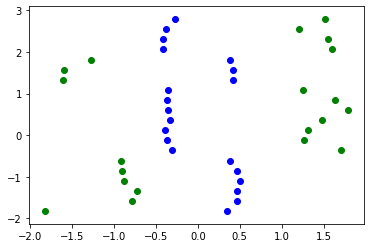

(array([[-1.82189266, -0.78993564, -0.72429223, -0.88055316, -0.90388906,
         -0.91373603,  1.70161843,  1.26906441,  1.30744487,  1.48502475,
          1.78696397,  1.63996368,  1.25381035, -1.60054643, -1.59717312,
         -1.2772079 ,  1.59377213,  1.54667276,  1.20805456,  1.51996615],
        [ 0.34342434,  0.4720803 ,  0.46487217,  0.50771164,  0.46534293,
          0.38613587, -0.31313236, -0.37198155, -0.39229262, -0.32768479,
         -0.35022371, -0.37302177, -0.35885466,  0.41536258,  0.41883382,
          0.38677011, -0.41255804, -0.42064255, -0.38342018, -0.27056741]]),
 [0, 1])

In [32]:
train_lvq(X_train, y_train, 25, 0.01, X_test, y_test)